Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import load_pickle, load_json

Settings

In [2]:
results_folder = "../FP_prediction/baseline_models/FT_results"
combined_results_folder = "../FP_prediction/baseline_models/results_w_sampling"
main_results_folder = "../FP_prediction/baseline_models/best_models"
datasets = ["massspecgym", "nist2023"]
models = ["binned_MS_encoder", "MS_encoder", "formula_encoder"]
all_samping_strategies = ["CF", "random"]

model_mapping = {"MS_encoder": "MS_", "binned_MS_encoder": "binned_", "formula_encoder": "formula_"}

Consolidate the performance

In [13]:
all_results_combined = {}

for dataset in datasets:

    if dataset not in all_results_combined: all_results_combined[dataset] = {}

    for model in models:

        if model not in all_results_combined[dataset]: all_results_combined[dataset][model] = {}

        # Get the 0% and 100% additional data results
        current_main_results_folder = os.path.join(main_results_folder, f"{dataset}_sieved")
        current_main_results_folder = [os.path.join(current_main_results_folder, f) \
                                       for f in os.listdir(current_main_results_folder) \
                                       if model_mapping[model] in f and "scaffold" in f]
        
        assert len(current_main_results_folder) == 1 
        current_main_results_folder = current_main_results_folder[0]
        no_add_data_jaccard = round(load_json(os.path.join(current_main_results_folder, "test_performance.json"))["jaccard"],3)

        # 1. Get the 100%
        current_main_results_folder = os.path.join(combined_results_folder, f"{dataset}", "random", f"{model}_100")
        assert os.path.exists(current_main_results_folder)
        full_add_data_jaccard = round(load_json(os.path.join(current_main_results_folder, "test_performance.json"))["jaccard"], 3)

        for sampling_strategy in all_samping_strategies:

            if sampling_strategy not in all_results_combined[dataset][model]: all_results_combined[dataset][model][sampling_strategy] = {} 

            current_folder = os.path.join(combined_results_folder, dataset, sampling_strategy)
            all_expts = [os.path.join(current_folder, f) for f in os.listdir(current_folder) if model in f and f"_{model}" not in f]

            for expt in all_expts: 

                ratio = int(expt.split("/")[-1].split("_")[-1])
                if "test_performance.json" not in os.listdir(expt): continue 
                score = round(load_json(os.path.join(expt, "test_performance.json"))["jaccard"], 3)
                all_results_combined[dataset][model][sampling_strategy][ratio] = score 

            all_results_combined[dataset][model][sampling_strategy][0.0] = no_add_data_jaccard
            all_results_combined[dataset][model][sampling_strategy][100.0] = full_add_data_jaccard 

In [5]:
all_results = {}

for dataset in datasets:

    if dataset not in all_results: all_results[dataset] = {} 

    for model in models:

        if model not in all_results[dataset]: all_results[dataset][model] = {}

        # Get the 0% and 100% additional data results
        # 1. Get the 0%
        current_main_results_folder = os.path.join(main_results_folder, f"{dataset}_sieved")
        current_main_results_folder = [os.path.join(current_main_results_folder, f) \
                                       for f in os.listdir(current_main_results_folder) \
                                        if model_mapping[model] in f and "scaffold" in f]
        
        assert len(current_main_results_folder) == 1 
        current_main_results_folder = current_main_results_folder[0]
        no_add_data_jaccard = round(load_json(os.path.join(current_main_results_folder, "test_performance.json"))["jaccard"],3)

        # 1. Get the 100%
        current_main_results_folder = os.path.join(results_folder, dataset, "random")
        current_main_results_folder = [os.path.join(current_main_results_folder, f) for f in os.listdir(current_main_results_folder) if model in f and f"_{model}" not in f and "100" in f]
        if len(current_main_results_folder) != 1:
            print(dataset, model)
        assert len(current_main_results_folder) == 1 
        current_main_results_folder = current_main_results_folder[0]
        full_add_data_jaccard = round(load_json(os.path.join(current_main_results_folder, "test_performance.json"))["jaccard"],3)

        for sampling_strategy in all_samping_strategies:

            if sampling_strategy not in all_results[dataset][model]: all_results[dataset][model][sampling_strategy] = {} 

            current_folder = os.path.join(results_folder, dataset, sampling_strategy)
            all_expts = [os.path.join(current_folder, f) for f in os.listdir(current_folder) if model in f and f"_{model}" not in f]

            for expt in all_expts: 

                ratio = int(expt.split("/")[-1].split("_")[-1])
                if "test_performance.json" not in os.listdir(expt): continue 
                score = round(load_json(os.path.join(expt, "test_performance.json"))["jaccard"], 3)
                all_results[dataset][model][sampling_strategy][ratio] = score 

            all_results[dataset][model][sampling_strategy][0.0] = no_add_data_jaccard 
            all_results[dataset][model][sampling_strategy][100.0] = full_add_data_jaccard 

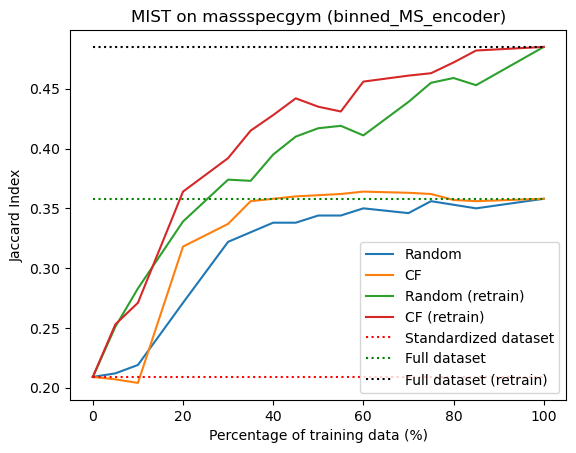

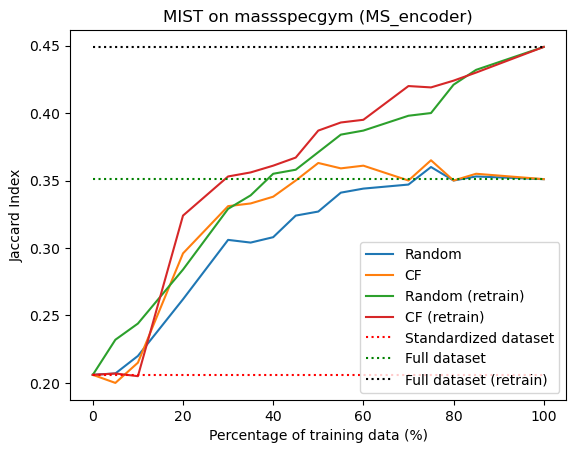

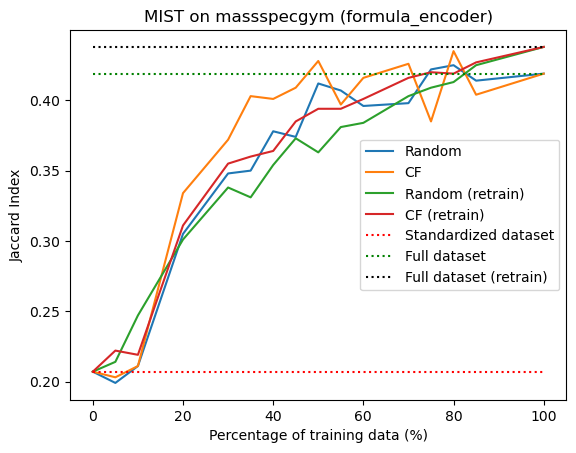

In [16]:
dataset = "massspecgym"
for model in ["binned_MS_encoder", "MS_encoder", "formula_encoder"]:

    x_values = sorted(list(all_results_combined["massspecgym"]["MS_encoder"]["random"].keys()))
    x_values = [x for x in x_values if x != 90.0]

    random = [all_results["massspecgym"][model]["random"][x] for x in x_values]
    CF = [all_results["massspecgym"][model]["CF"][x] for x in x_values]
    # IF_test = [all_results["massspecgym"][model]["IF_test"][x] for x in x_values]
    # IF_val = [all_results["massspecgym"][model]["IF_val"][x] for x in x_values]
    subset = [all_results["massspecgym"][model]["random"][0.0] for _ in x_values]
    full = [all_results["massspecgym"][model]["random"][100.0] for _ in x_values]

    random_full = [all_results_combined["massspecgym"][model]["random"][x] for x in x_values]
    CF_full = [all_results_combined["massspecgym"][model]["CF"][x] for x in x_values]
    # IF_test_full = [all_results_combined["massspecgym"][model]["IF_test"][x] for x in x_values]
    # IF_val_full = [all_results_combined["massspecgym"][model]["IF_val"][x] for x in x_values]
    full_full = [all_results_combined["massspecgym"][model]["random"][100.0] for _ in x_values]

    plt.title(f"MIST on {dataset} ({model})")

    plt.xlabel("Percentage of training data (%)")
    plt.ylabel("Jaccard Index")

    # plt.plot(x_values, IF_test, label = "IF (test)")
    # plt.plot(x_values, IF_val, label = "IF (val)")
    plt.plot(x_values, random, label = "Random")
    plt.plot(x_values, CF, label = "CF")

    plt.plot(x_values, random_full, label = "Random (retrain)")
    plt.plot(x_values, CF_full, label = "CF (retrain)")
    # plt.plot(x_values, IF_test_full, label = "IF (test, retrain)")
    # plt.plot(x_values, IF_val_full, label = "IF (val, retrain)")


    plt.plot(x_values, subset, label = "Standardized dataset", linestyle = "dotted", color = "red")
    plt.plot(x_values, full, label = "Full dataset", linestyle = "dotted", color = "green")
    plt.plot(x_values, full_full, label = "Full dataset (retrain)", linestyle = "dotted", color = "black")

    plt.legend()
    plt.show()

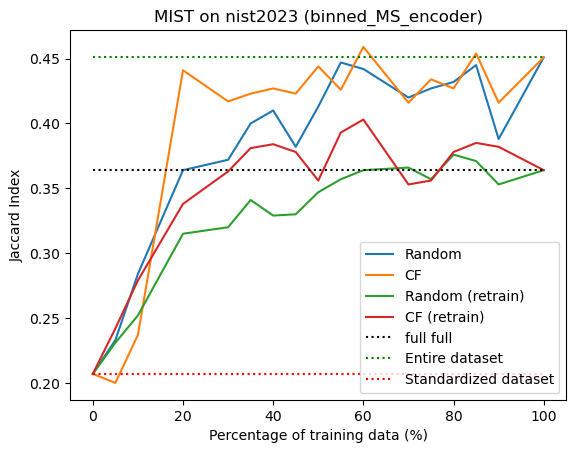

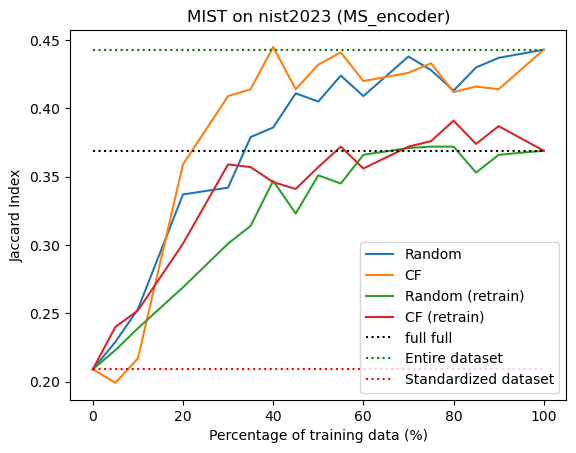

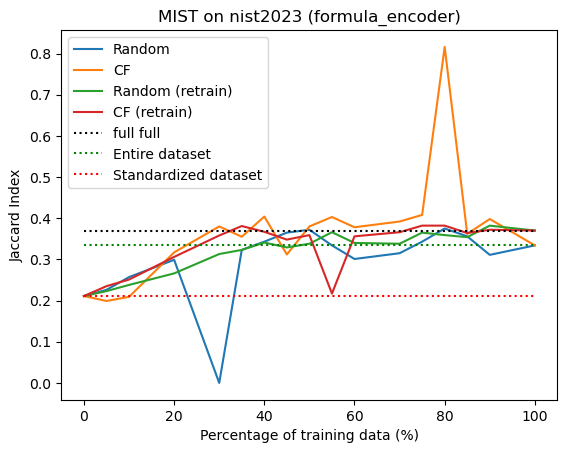

In [17]:
dataset = "nist2023"

for model in ["binned_MS_encoder", "MS_encoder", "formula_encoder"]:

    x_values = sorted(list(all_results["nist2023"]["MS_encoder"]["random"].keys()))

    random = [all_results["nist2023"][model]["random"][x] for x in x_values]
    CF = [all_results["nist2023"][model]["CF"][x] for x in x_values]
    # IF_test = [all_results["nist2023"][model]["IF_test"][x] for x in x_values]
    # IF_val = [all_results["nist2023"][model]["IF_val"][x] for x in x_values]
    subset = [all_results["nist2023"][model]["random"][0.0] for _ in x_values]
    full = [all_results["nist2023"][model]["random"][100.0] for _ in x_values]

    random_full = [all_results_combined["nist2023"][model]["random"][x] for x in x_values]
    CF_full = [all_results_combined["nist2023"][model]["CF"][x] for x in x_values]
    # IF_test_full = [all_results_combined["nist2023"][model]["IF_test"][x] for x in x_values]
    # IF_val_full = [all_results_combined["nist2023"][model]["IF_val"][x] for x in x_values]
    full_full = [all_results_combined["nist2023"][model]["random"][100.0] for _ in x_values]

    plt.title(f"MIST on {dataset} ({model})")

    plt.xlabel("Percentage of training data (%)")
    plt.ylabel("Jaccard Index")

    # plt.plot(x_values, IF_test, label = "IF_test")
    # plt.plot(x_values, IF_val, label = "IF_val")
    plt.plot(x_values, random, label = "Random")
    plt.plot(x_values, CF, label = "CF")

    plt.plot(x_values, random_full, label = "Random (retrain)")
    plt.plot(x_values, CF_full, label = "CF (retrain)")
    # plt.plot(x_values, IF_test_full, label = "IF_test full")
    # plt.plot(x_values, IF_val_full, label = "IF_val full")
    plt.plot(x_values, full_full, label = "full full", linestyle = "dotted", color = "black")

    plt.plot(x_values, full, label = "Entire dataset", linestyle = "dotted", color = "green")
    plt.plot(x_values, subset, label = "Standardized dataset", linestyle = "dotted", color = "red")

    plt.legend()
    plt.show()